In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
import pandas as pd
import zipfile

# Open and read train.csv.zip
with zipfile.ZipFile("train.csv.zip") as z:
    with z.open("train.csv") as f:   # file inside the zip
        train_df = pd.read_csv(f)

print(train_df.shape)
train_df.head()


(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
# Open and read test.csv.zip
with zipfile.ZipFile("test.csv.zip") as z:
    with z.open("test.csv") as f:
        test_df = pd.read_csv(f)

print(test_df.shape)
test_df.head()


(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


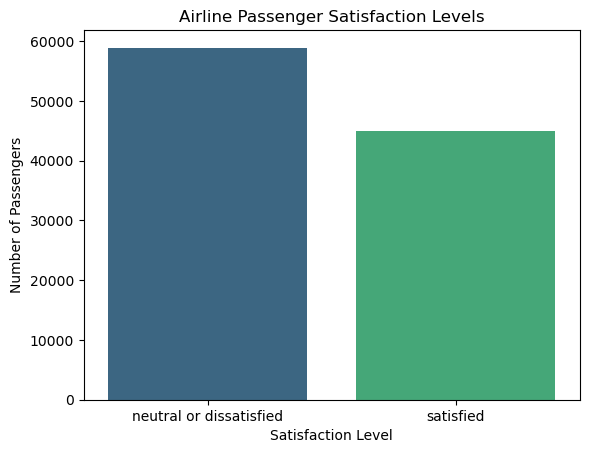

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so seaborn can treat categories properly
counts = train_df['satisfaction'].value_counts().reset_index()
counts.columns = ['satisfaction', 'count']

# Plot bar chart correctly
sns.barplot(data=counts, x="satisfaction", y="count", hue="satisfaction", palette="viridis", legend=False)
plt.title("Airline Passenger Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Passengers")
plt.show()


In [ ]:
“How does satisfaction vary by travel class?”

      Class             satisfaction  count
0  Business  neutral or dissatisfied  15185
1  Business                satisfied  34480
2       Eco  neutral or dissatisfied  38044
3       Eco                satisfied   8701
4  Eco Plus  neutral or dissatisfied   5650
5  Eco Plus                satisfied   1844


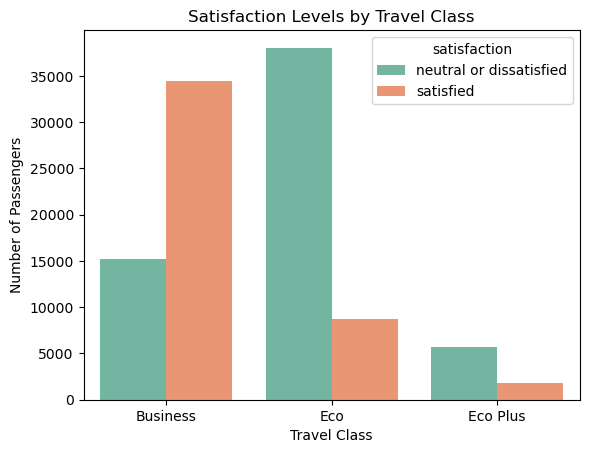

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

# Load dataset
with zipfile.ZipFile("train.csv.zip") as z:
    with z.open("train.csv") as f:
        df = pd.read_csv(f)

# Step 1: Group by Class and Satisfaction
class_satisfaction = df.groupby(["Class", "satisfaction"]).size().reset_index(name="count")
print(class_satisfaction)

# Step 2: Plot stacked bar chart
sns.barplot(data=class_satisfaction, x="Class", y="count", hue="satisfaction", palette="Set2")
plt.title("Satisfaction Levels by Travel Class")
plt.xlabel("Travel Class")
plt.ylabel("Number of Passengers")
plt.show()


In [23]:
import pandas as pd
import zipfile

# Load dataset from zip
with zipfile.ZipFile("train.csv.zip") as z:
    with z.open("train.csv") as f:
        df = pd.read_csv(f)


In [25]:
# Map satisfaction: Satisfied = 1, Neutral or dissatisfied = 0
df["satisfaction_num"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})


In [27]:
service_features = [
    "Inflight wifi service", "Food and drink", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling", "Checkin service",
    "Cleanliness", "Online boarding"
]

corr = df[service_features + ["satisfaction_num"]].corr()["satisfaction_num"].sort_values(ascending=False)
print(corr)


satisfaction_num          1.000000
Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Inflight wifi service     0.284245
Baggage handling          0.247749
Checkin service           0.236174
Food and drink            0.209936
Name: satisfaction_num, dtype: float64


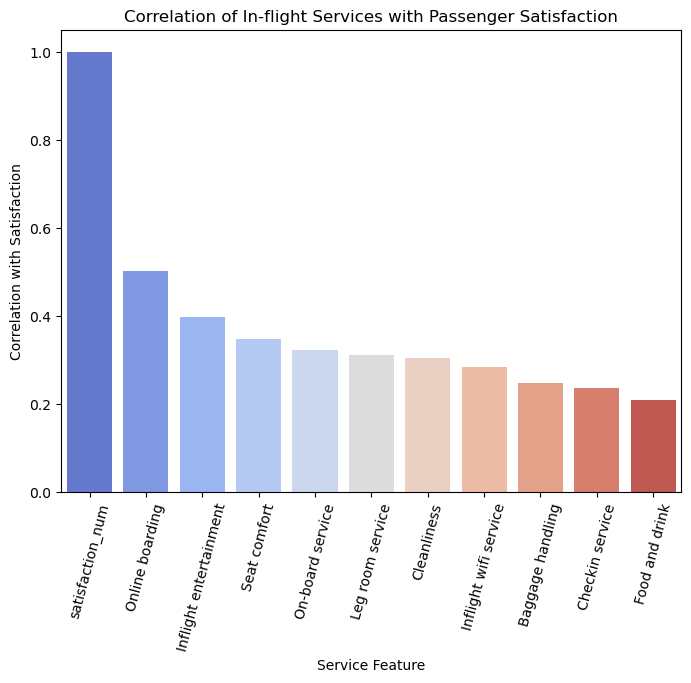

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert correlation series into DataFrame
corr_df = corr.reset_index()
corr_df.columns = ["feature", "correlation"]

plt.figure(figsize=(8,6))
sns.barplot(data=corr_df, x="feature", y="correlation", hue="feature", palette="coolwarm", legend=False)
plt.xticks(rotation=75)
plt.title("Correlation of In-flight Services with Passenger Satisfaction")
plt.ylabel("Correlation with Satisfaction")
plt.xlabel("Service Feature")
plt.show()


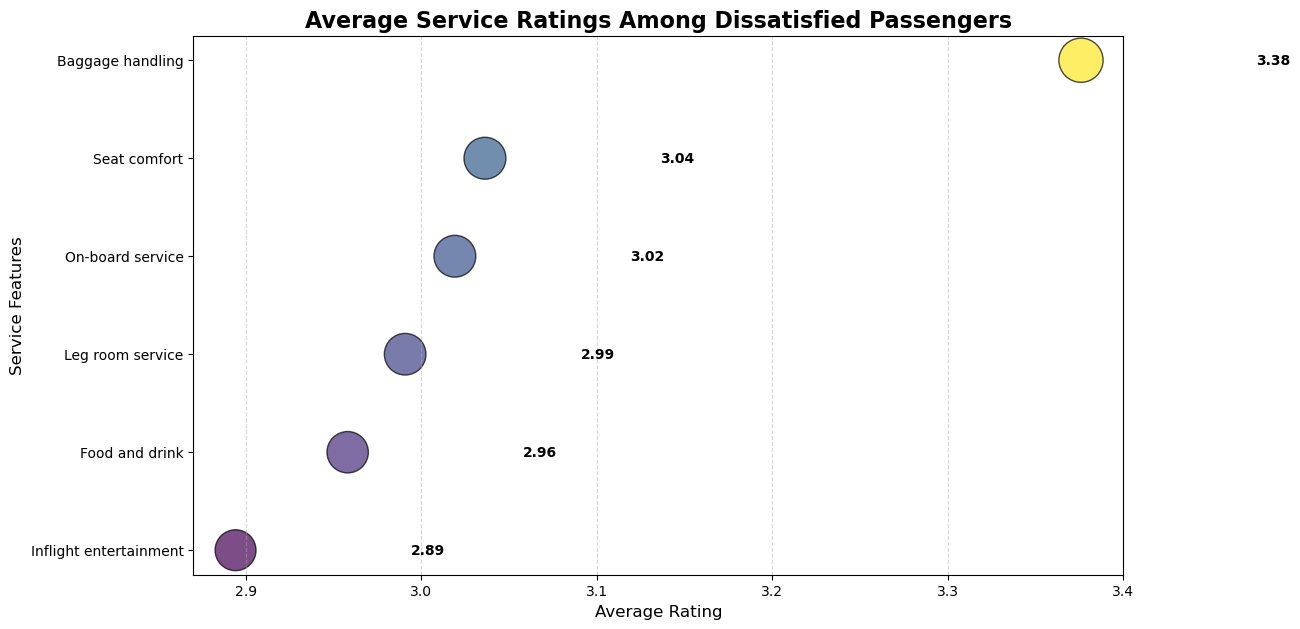

In [68]:
plt.figure(figsize=(12, 7))

# Normalize bubble size for better visuals
sizes = mean_ratings.values * 300  

# Use a gradient color palette (higher rating = darker color)
colors = sns.color_palette("viridis", len(mean_ratings))

# Bubble plot
plt.scatter(mean_ratings.values, mean_ratings.index, 
            s=sizes, c=mean_ratings.values, cmap="viridis", 
            alpha=0.7, edgecolor="black", linewidth=1)

# Add labels next to bubbles (not overlapping inside)
for i, v in enumerate(mean_ratings.values):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center', fontsize=10, weight='bold', color="black")

# Titles and labels
plt.title("Average Service Ratings Among Dissatisfied Passengers", fontsize=16, weight='bold')
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Service Features", fontsize=12)

# Grid for readability
plt.grid(axis='x', linestyle="--", alpha=0.5)

plt.show()


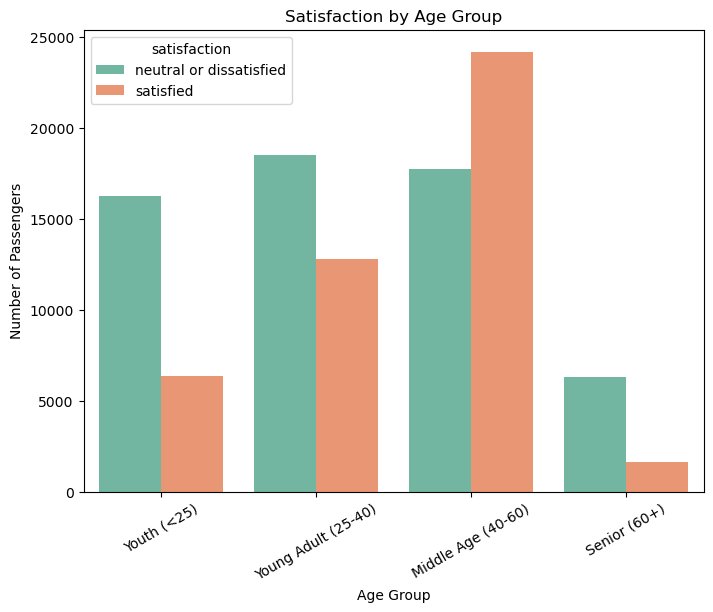

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create Age Groups
bins = [0, 25, 40, 60, 100]
labels = ["Youth (<25)", "Young Adult (25-40)", "Middle Age (40-60)", "Senior (60+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Countplot by Age Group & Satisfaction
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="AgeGroup", hue="satisfaction", palette="Set2")
plt.title("Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=30)
plt.show()


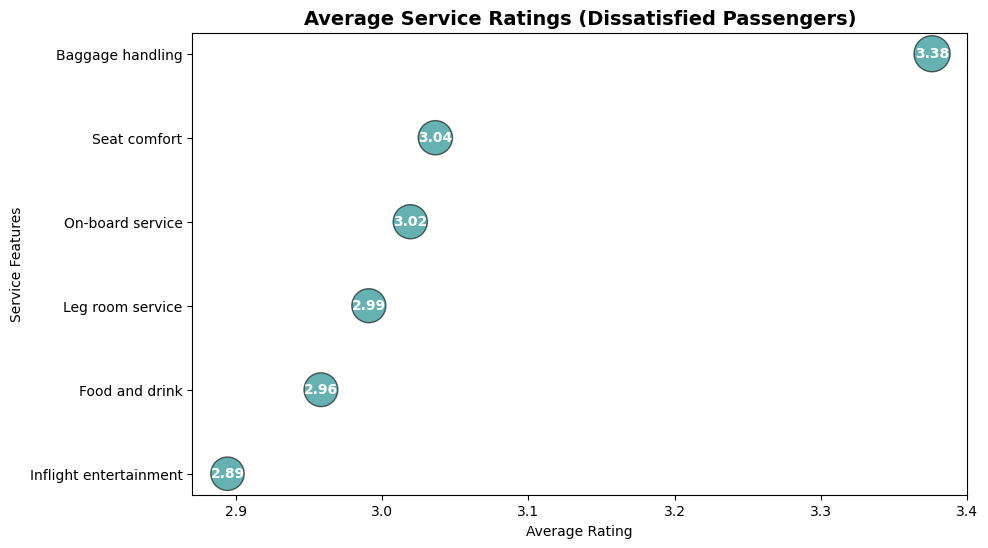

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings.values, mean_ratings.index, 
            s=mean_ratings.values*200,  # bubble size
            color="teal", alpha=0.6, edgecolor="black")

plt.title("Average Service Ratings (Dissatisfied Passengers)", fontsize=14, weight='bold')
plt.xlabel("Average Rating")
plt.ylabel("Service Features")

# Add labels inside bubbles
for i, v in enumerate(mean_ratings.values):
    plt.text(v, i, f"{v:.2f}", ha='center', va='center', fontsize=10, weight='bold', color="white")

plt.show()


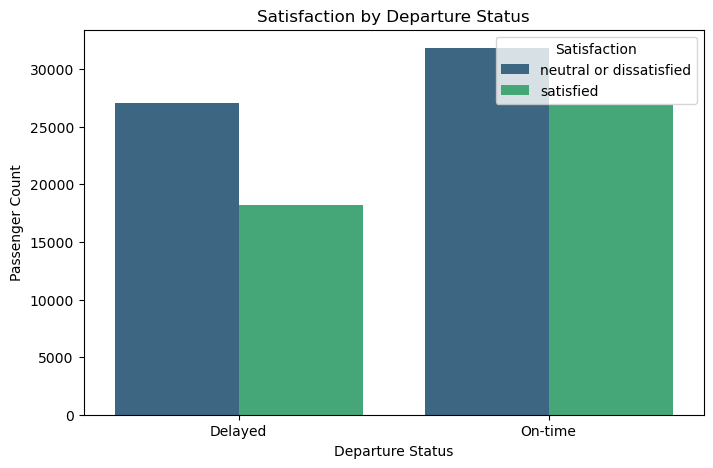

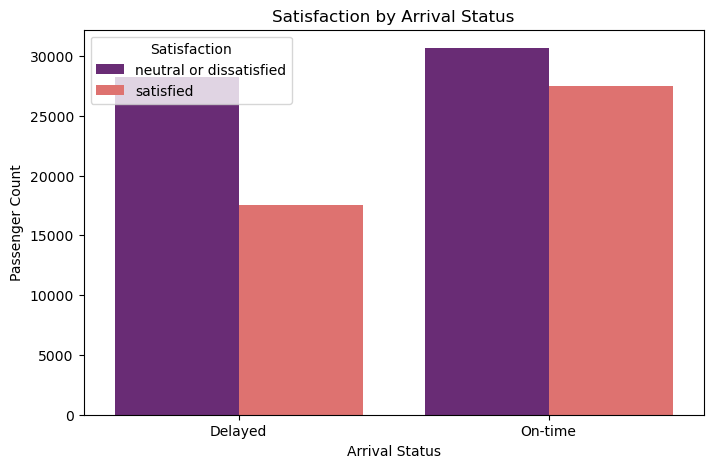

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create delay status columns
df['DepartureStatus'] = df['Departure Delay in Minutes'].apply(lambda x: 'On-time' if x == 0 else 'Delayed')
df['ArrivalStatus'] = df['Arrival Delay in Minutes'].apply(lambda x: 'On-time' if x == 0 else 'Delayed')

# Compare satisfaction distribution by Departure status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='DepartureStatus', hue='satisfaction', palette='viridis')
plt.title("Satisfaction by Departure Status")
plt.xlabel("Departure Status")
plt.ylabel("Passenger Count")
plt.legend(title="Satisfaction")
plt.show()

# Compare satisfaction distribution by Arrival status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ArrivalStatus', hue='satisfaction', palette='magma')
plt.title("Satisfaction by Arrival Status")
plt.xlabel("Arrival Status")
plt.ylabel("Passenger Count")
plt.legend(title="Satisfaction")
plt.show()


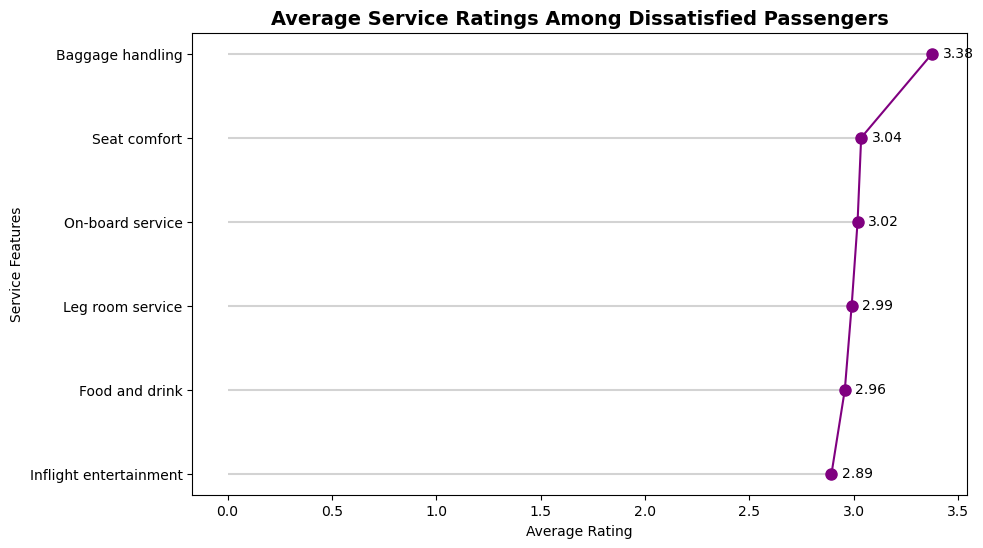

In [63]:
plt.figure(figsize=(10, 6))
plt.hlines(y=mean_ratings.index, xmin=0, xmax=mean_ratings.values, color="lightgray")
plt.plot(mean_ratings.values, mean_ratings.index, "o-", color="purple", markersize=8)
plt.title("Average Service Ratings Among Dissatisfied Passengers", fontsize=14, weight='bold')
plt.xlabel("Average Rating")
plt.ylabel("Service Features")

# Add value labels
for i, v in enumerate(mean_ratings.values):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center')

plt.show()
